## Observations and Insights 

In [273]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
both_df= pd.merge(study_results,mouse_metadata, how = 'left', on ='Mouse ID',)
both_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [274]:
# Checking the number of mice in the DataFrame.
n_mice_=(both_df["Mouse ID"]).unique()
n_mice=len(both_df['Mouse ID'].unique())
n_mice

249

In [275]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# d_mice_id = both_df.loc[:,['Mouse ID', 'Timepoint']]
# d_mice_id.head()

d_mice_id= both_df.duplicated(subset=['Mouse ID','Timepoint'])
both_df[d_mice_id]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [283]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df= d_mice.drop_duplicates("Mouse ID", keep = "last")
#clean_df.head()

#clean_df= d_mice.drop_duplicates(inplace = True)

# d_mice_id= both_df[both_df.duplicated(['Mouse ID'])]
# clean_df=d_mice_id.drop_duplicate('Mouse ID')
# clean_df= d_mice

unique=both_df[d_mice_id]['Mouse ID'].unique()
clean_df = both_df.loc[~both_df['Mouse ID'].isin(unique)]
clean_df.head()


# unique=combined_df[duplicate_mice]['Mouse ID'].unique()
# clean_df = combined_df.loc[~combined_df['Mouse ID'].isin(unique)]
# clean_df.head()



ValueError: Boolean array expected for the condition, not object

In [269]:
# Checking the number of mice in the clean DataFrame.
n_mice_clean_df=len(clean_df['Mouse ID'].unique())
n_mice_clean_df

# # Checking the number of mice in the clean DataFrame.
# number_of_mice_after_cleanup=len(clean_df["Mouse ID"].unique())
# number_of_mice_after_cleanup


248

## Summary Statistics

In [258]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean = both_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median = both_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = both_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard_deviation = both_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = both_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summ = pd.DataFrame({'Mean':mean,'Median':median,'Variance':variance,'Standard Deviation':standard_deviation,'SEM':sem})
summ

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [259]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summ_sta_table=both_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summ_sta_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

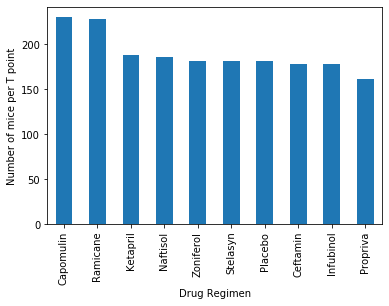

In [260]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
counts=both_df["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of mice per T point")
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

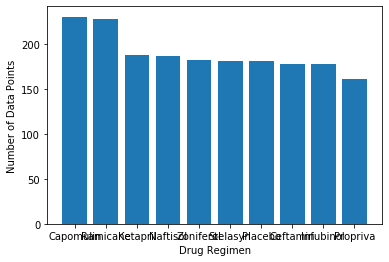

In [261]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

plt.bar(counts.index, counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks()

## Pie Plots

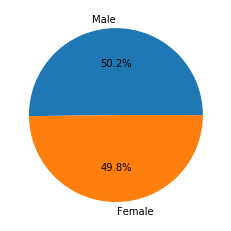

In [262]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = mouse_metadata.Sex.value_counts()
plt.pie(counts.values,labels=["Male","Female"],autopct='%1.1f%%')
plt.show()

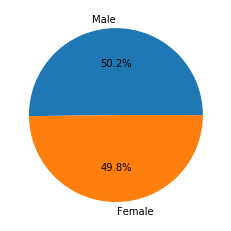

In [263]:
# Generatea pie plot showing the distribution of female versus male mice using pyplot
gendernew_df=plt.pie(counts.values,labels=['Male','Female'], autopct='%1.1f%%'),#name='Sex')

## Quartiles, Outliers and Boxplots

In [264]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#redo it 
by_mouse = both_df.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse.reset_index()
merged_data = by_mouse_reset[['Mouse ID','Timepoint']].\
    merge(both_df,on=['Mouse ID','Timepoint'],how="left")
def get_outliers(regimen):
    regimen_data = merged_data.loc[merged_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)
    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(outliers)
    return regimen_data
cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")







Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


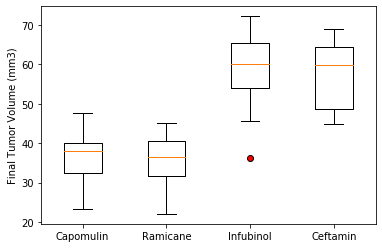

In [265]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#redo it 
plt.boxplot([cap, ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'], flierprops={'marker':'o','markeredgecolor': 'black','markerfacecolor':'red'})
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

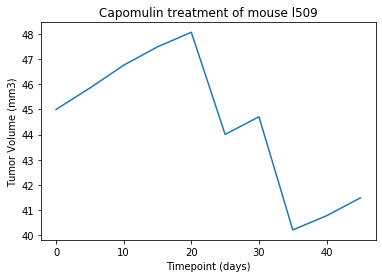

In [266]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_table = both_df.loc[both_df['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

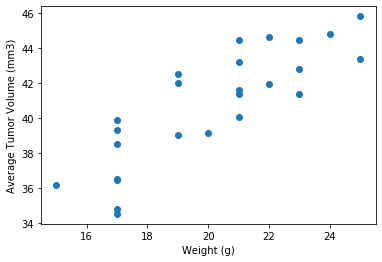

In [267]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#Capomulin regimen
#capomulin=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:]
average_tumor = capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(average_tumor['Weight (g)'],average_tumor['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('weightscatterplot')
plt.show()


## Correlation and Regression

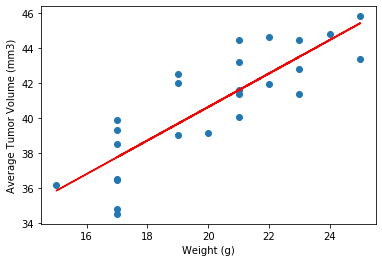

In [268]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
average_tumor = capomulin_table.groupby(['Mouse ID']).mean()
x_values = average_tumor['Weight (g)']
y_values = average_tumor['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()